In [20]:
import pandas as pd

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

# 1.. collect data

### There are 2 ways to find all the stuffs available 
      at this particular path :
      
    1..use listdir function of os 
    2..glob module..

In [21]:
'''

import os
os.listdir(r'G:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr')

'''

"\n\nimport os\nos.listdir(r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr')\n\n"

In [22]:
import glob

In [23]:

### ie ,at this path 'G:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr'
### I need all the csv files..

glob.glob(r'G:\EDA_projects\Stock_Data\individual_stocks_5yr\
            individual_stocks_5yr/*csv')

['G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAL_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAP_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABBV_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABC_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ABT_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ACN_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADBE_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADI_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\ADM_data.csv',
 'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_s

#### The tech stocks we'll use for this analysis--
    Apple
    Amazon
    Google
    Microsoft

In [24]:
'''
    
Now lets store entire data of all countries in full_df
Ways to do it--
    1) using os.listdir() , access all the files..
        a)using while loop & pd.append()
        b)using for loop & pd.append()
        c)using while loop & pd.concat()
        d)using for loop & pd.concat()
        e)using for loop & list append

    2) using glob , find all the files along with the path..
        a)using dataframe & concat
        b)using list & list append
        c)using dataframe & pandas append()
        
'''

'\n    \nNow lets store entire data of all countries in full_df\nWays to do it--\n    1) using os.listdir() , access all the files..\n        a)using while loop & pd.append()\n        b)using for loop & pd.append()\n        c)using while loop & pd.concat()\n        d)using for loop & pd.concat()\n        e)using for loop & list append\n\n    2) using glob , find all the files along with the path..\n        a)using dataframe & concat\n        b)using list & list append\n        c)using dataframe & pandas append()\n        \n'

In [25]:
## take AAPL , AMZN , GOOG , MSFT.csv 

company_list=
[
r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv',
r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AMZN_data.csv',
r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\GOOG_data.csv',
r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\MSFT_data.csv'
]


#blank dataframe

all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data=current_df.append(all_data , \
                               ignore_index=True)



In [26]:
all_data.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT


In [27]:
all_data.shape

(4752, 7)

In [28]:
my_df=all_data.copy()

In [29]:
my_df['date']=pd.to_datetime(my_df['date'])

In [ ]:
my_df['date'].dtype

In [ ]:
my_df.dtypes

In [ ]:
'''
Refer 2_(6).. pandas_dtypes

actual data-type is "DatetimeTZDtype" &  by the way 
'datetime64[ns, <tz>]' is tha string alias
In date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])

datetime64[ns] is a general dtype,
while <M8[ns] is a specific dtype ,

Both are similar , it entirely depends upon how your numpy 
was compiled & on the bit architecture of the OS ..

Now architecture of numpy itself depends upon lots of factors like 
what environment u are using , what about the generation of your laptop too..


in dtype('<M8[ns]') , 
M is a character code in Python which stands for Date-time
and '<'  is little-endian
<M8[ns] also have a length of 8 Bytes(64 bits)



whereas datetime64[ns] basically have a length of 64 bits or 8 bytes ,





But if u want to think it bluntly , they are same..
By the way ,u can cross_check using below code:

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')


'''

In [30]:
my_df['date'][0]

Timestamp('2013-02-08 00:00:00')

In [31]:
my_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

#  2. Analysing closing price of the stock   
        overtime?

### ways to do it..
    1..using lineplot (pandas )
    

In [32]:
my_df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

#### using pandas lineplot

In [33]:
tech_list = my_df['Name'].unique()

In [34]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [35]:
for i, company in enumerate(tech_list,1):
    print(type(company))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [36]:
import matplotlib.pyplot as plt

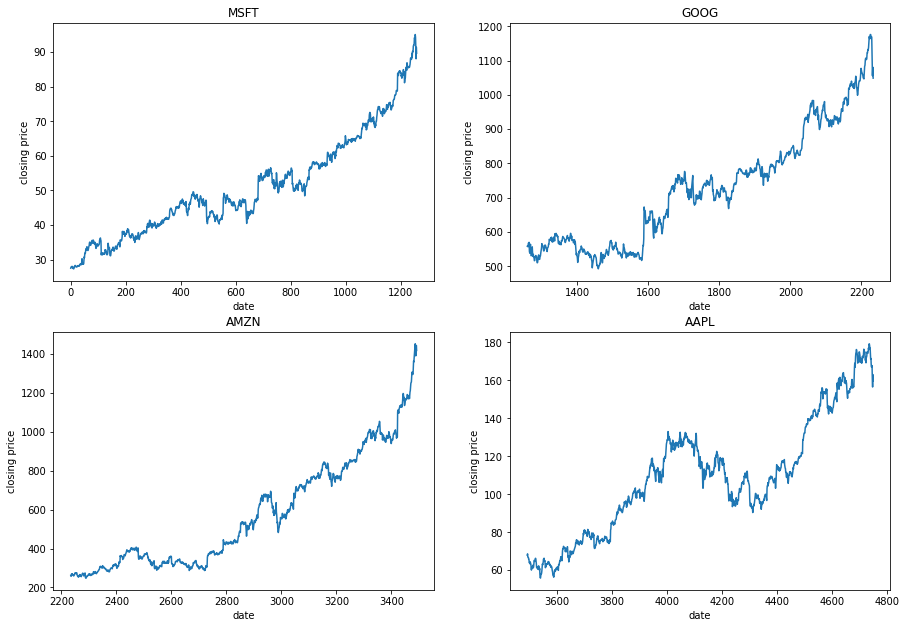

In [37]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25)

for index, tech in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    df=all_data[all_data['Name']==tech]
    df['close'].plot()
    plt.ylabel('closing price')
    plt.xlabel('date')
    plt.title(tech)
    

In [38]:
### Similarly we can analyse total volume of stock being 
    traded each day

# 3.. What was the moving average of 
      the various stocks?

In [ ]:
'''
Smoothening your series using moving average
Rolling is just like a window that you are going to consider
or I can say its a window that we have considered for Moving average,
lets say 5 is the window size or 5 is the business period

lets day u r expertise in any area & u know within 7 days, 
the maximum value is the true reflector of our business 
as we are in high growth era
& minimum value is a true reflector of our baseline, 
so in such case instead of mean , u can call min & max function

this technique has already used lots of time in Stock Market &
stock Analyst used basically Moving average to remove such noise in data..


'''

In [39]:
my_df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT


In [40]:
my_df['close'].rolling(10).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4747    171.948
4748    170.152
4749    168.101
4750    166.700
4751    165.232
Name: close, Length: 4752, dtype: float64

In [41]:
#### now lets consider different windows of rolling ,ie 
    10 days ,20 days ,30 days 

In [42]:
ma_day = [10, 20, 50]

for ma in ma_day:
    my_df['close'+'_'+str(ma)] = my_df['close'].rolling(ma).mean()
    
    
'''

my_df['close_10']=my_df['close'].rolling(10).mean()
my_df['close_20']=my_df['close'].rolling(20).mean()
my_df['close_30']=my_df['close'].rolling(30).mean()

'''

"\n\nmy_df['close_10']=my_df['close'].rolling(10).mean()\nmy_df['close_20']=my_df['close'].rolling(20).mean()\nmy_df['close_30']=my_df['close'].rolling(30).mean()\n\n"

In [43]:
my_df.tail(5)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [44]:
my_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

In [45]:
my_df['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [46]:
import matplotlib.pyplot as plt

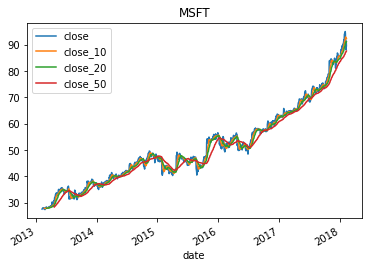

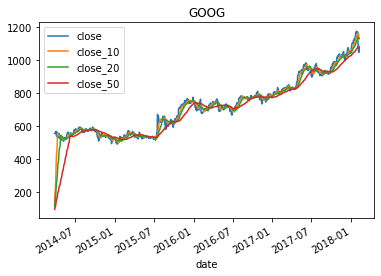

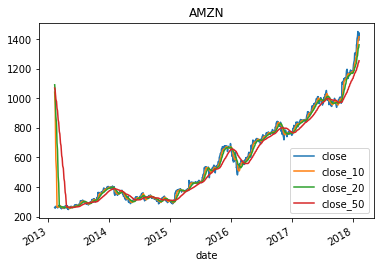

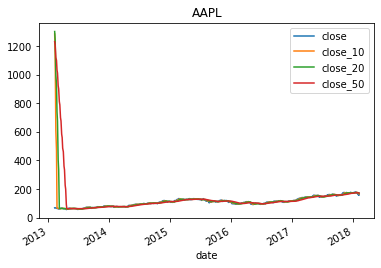

In [47]:
for name in my_df['Name'].unique():
    current_df=my_df[my_df['Name']==name]
    current_df.set_index('date')[['close','close_10',\
                          'close_20', 'close_50']].plot()
    plt.title(name)

# 4..Analyse monthly mean of closing Price

#### ways to do it..
    1..using resampling
    2..using grouping

##### 1..using resampling
    Before doing resampling,first u have to make sure that 
    your date feature must be 'row-index' so that u can resample it :
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

In [48]:
my_df.head(2)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN


In [49]:
my_df.set_index('date',inplace=True)

In [50]:
my_df.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

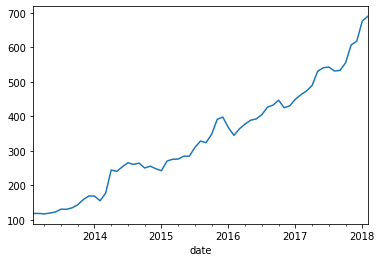

In [51]:
my_df['close'].resample('M').mean().plot()

##### resampling close column year wise

<AxesSubplot:xlabel='date'>

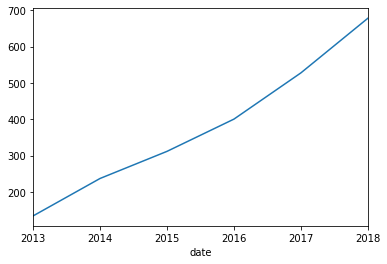

In [52]:
my_df['close'].resample('Y').mean().plot()

# 5.. Checking if the Stock prices of these tech     companies(Amazon,Apple,Google,Microsoft)
are correlated or not !

In [53]:
my_df.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,NaN,NaN,NaN


In [54]:
my_df.isnull().sum()

open         0
high         0
low          0
close        0
volume       0
Name         0
close_10     9
close_20    19
close_50    49
dtype: int64

#### 1..using loop

In [55]:
my_df['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [56]:
closing_price = pd.DataFrame()

In [57]:
for comp in my_df['Name'].unique():
    current_df=my_df[my_df['Name']==comp]
    closing_price[comp+'_close']=current_df['close']

In [58]:
closing_price.head(2)

,MSFT_close,GOOG_close,AMZN_close,AAPL_close
date,,,,
2013-02-08,27.55,NaN,261.95,67.8542
2013-02-11,27.86,NaN,257.21,68.5614


In [32]:
for comp in my_df['Name'].unique():
    current_df=my_df[my_df['Name']==comp]
    closing_price[comp+'_close']=current_df['close']

In [33]:
closing_price.head(2)

,MSFT_close,GOOG_close,AMZN_close,AAPL_close
date,,,,
2013-02-08,27.55,NaN,261.95,67.8542
2013-02-11,27.86,NaN,257.21,68.5614


##### co-relation plot for stock prices

In [34]:
closing_price.corr()

,MSFT_close,GOOG_close,AMZN_close,AAPL_close
MSFT_close,1.000000,0.967981,0.955977,0.899689
GOOG_close,0.967981,1.000000,0.978721,0.755274
AMZN_close,0.955977,0.978721,1.000000,0.819078
AAPL_close,0.899689,0.755274,0.819078,1.000000


In [35]:
### u can think of using styling this dataframe
closing_price.corr().style.background_gradient()

,MSFT_close,GOOG_close,AMZN_close,AAPL_close
MSFT_close,1.000000,0.967981,0.955977,0.899689
GOOG_close,0.967981,1.000000,0.978721,0.755274
AMZN_close,0.955977,0.978721,1.000000,0.819078
AAPL_close,0.899689,0.755274,0.819078,1.000000


In [36]:
from pandas.plotting import scatter_matrix

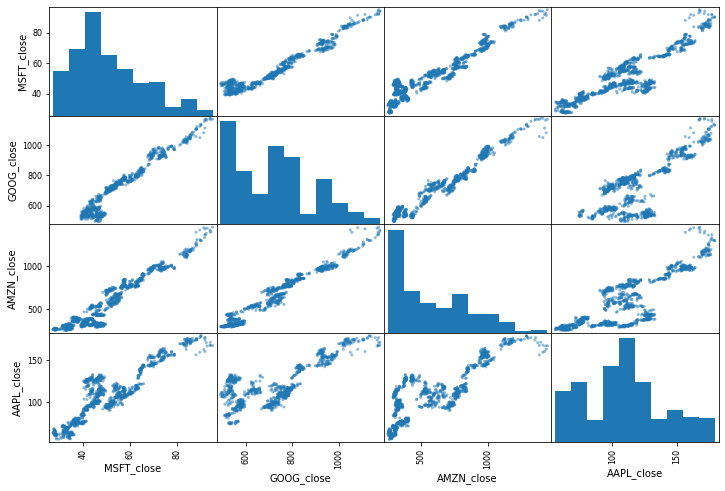

'\nEach scatter plot in the matrix helps us understand the correlation between the corresponding pair of attributes\n\n'

In [43]:
scatter_matrix(closing_price ,figsize=(12,8))
plt.show()


'''
Each scatter plot in the matrix helps us understand the 
correlation between the corresponding pair of attributes

'''

<AxesSubplot:>

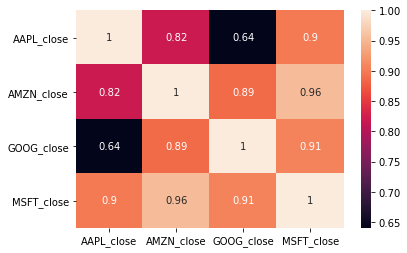

In [140]:
## sns.heatmap(closing_price.corr(),annot=True)

##### Closing price of Google and Microsoft are well correlated
       and Closing price of Amazon and Microsoft have a 
        co-relation of 0.96

# 6. Doing in-depth analysis of 'closing_price' feature ..
    boxplot
    density_plot()
    histogram
    kde
    

In [47]:
aapl=pd.read_csv(r'G:\\EDA_projects\\Stock_Data\\individual_stocks_5yr\\individual_stocks_5yr\\AAPL_data.csv')

In [48]:
aapl

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


<AxesSubplot:ylabel='Frequency'>

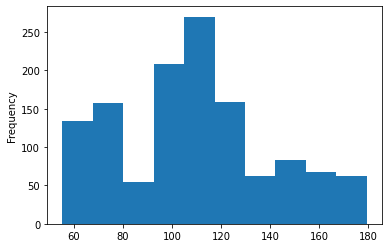

In [52]:
aapl['open'].plot(kind='hist')
## aapl['open'].plot.hist()
## aapl['open'].hist()



## lets smoothen this histogram & achieve density plot..

<AxesSubplot:ylabel='Density'>

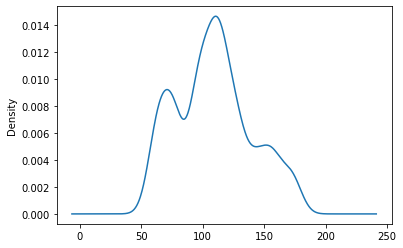

In [53]:
aapl['open'].plot(kind='kde')

## aapl['open'].plot(kind='density')

<AxesSubplot:>

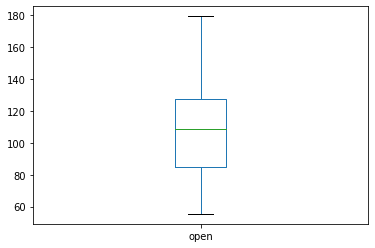

In [55]:
aapl['open'].plot(kind='box')